In [2]:
import keras
print(keras.__version__)

2.2.4


In [3]:
from keras.datasets import mnist

# load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# dimensions of the tensor train_images, stored in .ndim attribute
print("train_images.ndim = ", train_images.ndim)

# shape of the tensor train_images
print("train_images.shape = ", train_images.shape)

# data type of the tensor 
print("train_images.dtype = ", train_images.dtype)

train_images.ndim =  3
train_images.shape =  (60000, 28, 28)
train_images.dtype =  uint8


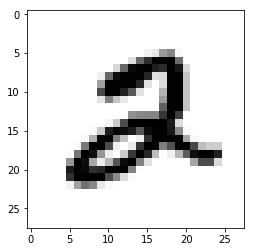

In [6]:
import matplotlib.pyplot as plt

# display one of the digits stored in the tensor 
digit = train_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# preprocess the data by reshaping it into the shape that the network expects
train_images = train_images.reshape((60000, 28 * 28))

# scale the data so that all values are in the [0, 1] interval
train_images = train_images.astype('float32') / 255

# preprocess test data
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_images.shape

Instructions for updating:
Colocations handled automatically by placer.


(60000, 784)

In [12]:
from keras.utils import to_categorical

# categorically encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
# train the network
network.fit(train_images, train_labels, epochs=40, batch_size=128)

Epoch 1/40
60000/60000 [==============================] - 2s 41us/step - loss: 5.1208e-04 - acc: 1.0000
Epoch 2/40
60000/60000 [==============================] - 2s 39us/step - loss: 5.4006e-04 - acc: 0.9999
Epoch 3/40
60000/60000 [==============================] - 2s 39us/step - loss: 4.5630e-04 - acc: 0.9999
Epoch 4/40
60000/60000 [==============================] - 2s 39us/step - loss: 4.0797e-04 - acc: 1.0000
Epoch 5/40
60000/60000 [==============================] - 2s 39us/step - loss: 4.1433e-04 - acc: 0.9999
Epoch 6/40
60000/60000 [==============================] - 2s 39us/step - loss: 3.9904e-04 - acc: 0.9999
Epoch 7/40
60000/60000 [==============================] - 2s 39us/step - loss: 3.1495e-04 - acc: 1.0000
Epoch 8/40
60000/60000 [==============================] - 2s 39us/step - loss: 3.8959e-04 - acc: 0.9999
Epoch 9/40
60000/60000 [==============================] - 2s 39us/step - loss: 3.6948e-04 - acc: 1.0000
Epoch 10/40
60000/60000 [==============================] - 2s 39

In [27]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 27us/step
test_loss: 0.11862923611106153
test_acc: 0.9833


In [28]:
# Classifying IMDB movie reviews
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

17465344/17464789 [==============================] - 11s 1us/step


In [29]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review)

1646592/1641221 [==============================] - 1s 1us/step
? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was

In [31]:
import numpy as np

def vectorize_sequences(sequences, dimension=1000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results



In [32]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)

# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [33]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [69]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 24000 samples, validate on 1000 samples
Epoch 1/20
24000/24000 [==============================] - 0s 8us/step - loss: 0.1482 - binary_accuracy: 0.9454 - val_loss: 0.4037 - val_binary_accuracy: 0.8470
Epoch 2/20
24000/24000 [==============================] - 0s 10us/step - loss: 0.1424 - binary_accuracy: 0.9501 - val_loss: 0.4034 - val_binary_accuracy: 0.8420
Epoch 3/20
24000/24000 [==============================] - 0s 8us/step - loss: 0.1396 - binary_accuracy: 0.9500 - val_loss: 0.4139 - val_binary_accuracy: 0.8400
Epoch 4/20
24000/24000 [==============================] - 0s 9us/step - loss: 0.1362 - binary_accuracy: 0.9516 - val_loss: 0.4166 - val_binary_accuracy: 0.8390
Epoch 5/20
24000/24000 [==============================] - 0s 9us/step - loss: 0.1310 - binary_accuracy: 0.9540 - val_loss: 0.4304 - val_binary_accuracy: 0.8370
Epoch 6/20
24000/24000 [==============================] - 0s 8us/step - loss: 0.1289 - binary_accuracy: 0.9557 - val_loss: 0.4546 - val_binary_accurac

In [70]:
history_dict = history.history
history_dict.keys()

print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.11862923611106153
test_acc: 0.9833


ValueError: x and y must have same first dimension, but have shapes (2,) and (20,)

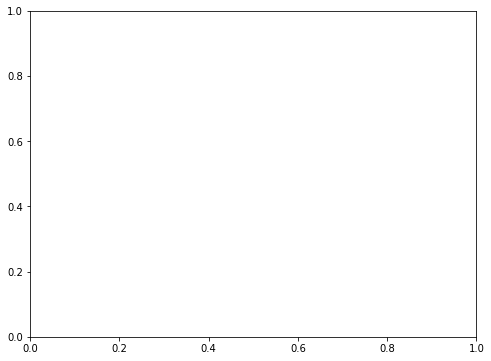

In [71]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']


plt.figure(figsize=(8,6))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# what this image showed is the 

In [86]:
model.predict(x_test)

array([[0.30176914],
       [0.9981862 ],
       [0.6776088 ],
       ...,
       [0.11493229],
       [0.03340629],
       [0.6553505 ]], dtype=float32)